<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/HypersonicEngine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

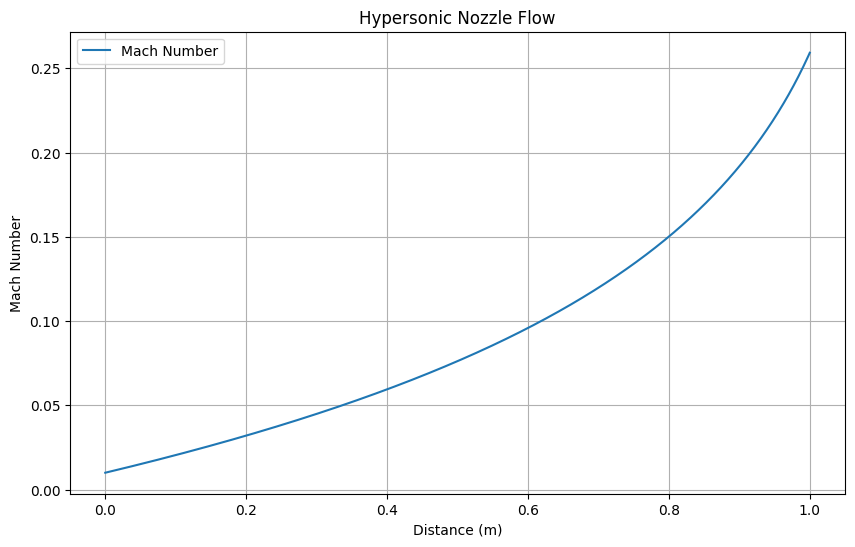

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4  # Specific heat ratio for air
R = 287.05   # Specific gas constant for air (J/(kg·K))
T0 = 300.0   # Inlet temperature (K)
P0 = 100000.0  # Inlet pressure (Pa)
A_inlet = 0.01  # Inlet area (m^2)
A_exit = 0.001  # Exit area (m^2)

# Define the nozzle geometry
L = 1.0  # Length of the nozzle (m)

# Discretize the nozzle into N points
N = 1000
x = np.linspace(0, L, N)

# Initialize arrays to store properties
T = np.zeros(N)
P = np.zeros(N)
M = np.zeros(N)
rho = np.zeros(N)

# Initial conditions at the inlet
T[0] = T0
P[0] = P0
A = A_inlet
rho[0] = P[0] / (R * T[0])
M[0] = 0.01  # Initial Mach number (adjust as needed)

# Time step
dt = 1e-6

# Perform the simulation using method of characteristics
for i in range(1, N):
    A = A + (A_exit - A_inlet) / N  # Linearly vary the area
    c = np.sqrt(gamma * R * T[i-1])
    M[i] = M[i-1] + ((1 - M[i-1]**2) / A) * dt
    T[i] = T[i-1] - (1 + (gamma - 1) * 0.5 * M[i-1]**2) * (T[i-1] / (1 + (gamma - 1) * 0.5 * M[i]**2)) * (A_exit - A_inlet) / N
    P[i] = P[i-1] - rho[i-1] * c**2 * ((M[i] - M[i-1]) / dt) * (A_exit - A_inlet) / N
    rho[i] = P[i] / (R * T[i])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, M, label='Mach Number')
plt.xlabel('Distance (m)')
plt.ylabel('Mach Number')
plt.title('Hypersonic Nozzle Flow')
plt.legend()
plt.grid()
plt.show()
